In [1]:
import numpy as np
import pandas as pd
import os
#import geopandas as gpd
import matplotlib.pyplot as plt
from descartes import PolygonPatch

In [2]:
DATA_DIR = 'data/airbnb-paris/'

# Load the data

In [3]:
calandar_df = pd.read_csv(os.path.join(DATA_DIR,'calendar.csv'), 
                         #compression='gzip',
                         #nrows = 1000,
                         )
listings_df = pd.read_csv(os.path.join(DATA_DIR,'listings.csv'),
                          #compression='gzip', 
                          usecols = ['id', 'amenities', 'neighbourhood_cleansed', 'host_is_superhost', 'host_identity_verified', 'host_has_profile_pic',
                                     'requires_license', 'instant_bookable', 'require_guest_profile_picture', 
                                     'require_guest_phone_verification', 'host_listings_count', 'accommodates', 
                                     'bathrooms', 'bedrooms', 'beds', 'price', 'guests_included', 'number_of_reviews',
                                     'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
                                     'review_scores_communication', 'review_scores_location','availability_365', 'cancellation_policy', 'property_type', 'room_type', 'bed_type',
                                     'longitude', 'latitude','security_deposit', 'cleaning_fee'],
                          #nrows = 1000,
)
reviews_df = pd.read_csv(os.path.join(DATA_DIR,'reviews.csv'),
                         #compression='gzip', 
                         #nrows = 1000,
                        )
#neighbourhoods_df = gpd.read_file(os.path.join(DATA_DIR,'neighbourhoods.geojson'))

In [4]:
listings_summary_df = pd.read_csv(os.path.join(DATA_DIR,'listings.csv'))
reviews_summary_df = pd.read_csv(os.path.join(DATA_DIR,'reviews.csv'))

/Users/Ilze/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (43,61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
def correction(x):
    '''
    Columns value corrections
    '''
    if type(x)==str:
        x=x.replace('$','')
        x=x.replace(',','')
        x=float(x)    
    return (x)

def correction2(x):
    '''
    Columns value corrections
    '''
    if type(x)==str:
        x=x.replace('%','')
        x=float(x)/100.0
    return (x)

def to_int(x):
    '''
    Columns value corrections
    '''
    if x=='f':
        x=x.replace('f','0')
    elif x=='t':
        x=x.replace('t','1')
    else:
        x= '0'
    return int(x)

def changeTime(x):
    '''
    change host_response_time columns from string into numerical.
    '''
    if x == 'within an hour':
        x='1'
    elif x == 'within a few hours':
        x='4'
    elif x == 'within a day':
        x='24'
    elif x == 'a few days or more':
        x='48'
    else:
        x='96'
        
    return x


def changeStr(x):
    '''
    change back the host_response_time from the numerical into strings
    '''
    if x == 1:
        x='within an hour'
    elif x == 4:
        x='within a few hours'
    elif x == 24:
        x='within a day'
    elif x == 48:
        x= 'a few days or more'
    elif x == 96:
        x= 'Not Response'
        
    return x

def createAmenities(x):
    '''
    Convert the Amenities column into more analytical words
    '''
    val = x.replace('{','').replace('}','').replace('"','').replace(' ','_').replace(',',' ')
    val = val.split()
    return val


def rangeScore(x):
    '''
    Set the bins for the score-range.
    '''
    value = ''
    if (x>= 0 and x < 10):
        value = '0-10'
    elif (x>= 10 and x < 20):
        value = '10-20'
    elif (x>= 20 and x < 30):
        value = '20-30'
    elif (x>= 30.0 and x < 40.0):
        value = '30-40'
    elif (x>= 40 and x < 50):
        value = '40-50'
    elif (x>= 50 and x < 60):
        value = '50-60'
    elif (x>= 60 and x < 70):
        value = '60-70'        
    elif (x>= 70 and x < 80):
        value = '70-80'
    elif (x>= 80 and x < 90):
        value = '80-90'
    elif (x>= 90 and x < 100):
        value = '90-100'
    elif x>= 100:
        value = '100+'
        
    return value

In [6]:
calandar_df['price'] = calandar_df['price'].apply(correction)
listings_df['price'] = listings_df['price'].apply(correction)
calandar_df['date'] = pd.to_datetime(calandar_df['date']) 

In [7]:
#neighbourhoods_df = neighbourhoods_df.drop(
#    columns='neighbourhood_group')

In [21]:
reviews_df.shape, listings_df.shape, calandar_df.shape

((1103367, 6), (59881, 33), (21856565, 4))

In [22]:
#print(16743307 / 5113258)
#pd.isna(calandar_df.price).value_counts()

# Merge Calandar with listings

In [23]:
rslt_df = calandar_df.merge(listings_df, left_on='listing_id', right_on='id', how='left')

In [24]:
calandar_df.available.value_counts()

f    16743307
t     5113258
Name: available, dtype: int64

In [25]:
(rslt_df['price_x'] == rslt_df['price_y']).value_counts()

False    19044346
True      2812219
dtype: int64

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
listings_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,59881.0,1.547383e+07,9.011231e+06,2577.000000,7.260534e+06,1.552999e+07,2.330446e+07,3.063802e+07
host_listings_count,59873.0,8.456984e+00,6.688432e+01,0.000000,1.000000e+00,1.000000e+00,2.000000e+00,1.305000e+03
latitude,59881.0,4.886417e+01,1.845156e-02,48.813083,4.885083e+01,4.886523e+01,4.887937e+01,4.890577e+01
longitude,59881.0,2.345693e+00,3.347671e-02,2.220731,2.324459e+00,2.348563e+00,2.371054e+00,2.473815e+00
accommodates,59881.0,3.041148e+00,1.531710e+00,1.000000,2.000000e+00,2.000000e+00,4.000000e+00,1.700000e+01
bathrooms,59805.0,1.108603e+00,6.426712e-01,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e+01
bedrooms,59813.0,1.087790e+00,9.745989e-01,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e+01
beds,59653.0,1.671634e+00,1.133853e+00,0.000000,1.000000e+00,1.000000e+00,2.000000e+00,5.000000e+01
price,59881.0,1.107843e+02,2.307343e+02,0.000000,5.500000e+01,8.000000e+01,1.190000e+02,2.500000e+04
guests_included,59881.0,1.445200e+00,9.710095e-01,1.000000,1.000000e+00,1.000000e+00,2.000000e+00,1.600000e+01


# remove the outlier
- The prediction of some points may be relatively far from the observed value.
These points are called outliers.
- They can be the result of an incorrect recording, or the observation can
come from a sub-population.
- To detect such points, *Cornillon and Matzner-Løber* (2007) suggests using **standardized residuals**.
- Normalized residuals are given by:
$$ r_{i} = \frac{e_{i}}{\sigma \sqrt{1 - h_{ii}}}$$   
where $h_{ii}$ is the $(i, j)$ th element of the matrix $X (X^{T}X)^{-1} X^{T}$
- Replacing $\sigma$ by its estimate $\hat{\sigma}$ gives the **standardized residuals**:
$$t_{i} = \frac{e_{i}}{\hat{\sigma} \sqrt{1 - h_{ii}}}$$

In [28]:
# 12 logements loués à plus de 5000 $ par nuit 
listings_df[listings_df['price'] >= 5000]['price'].value_counts().sum()

12

# Vizualisation map listing price

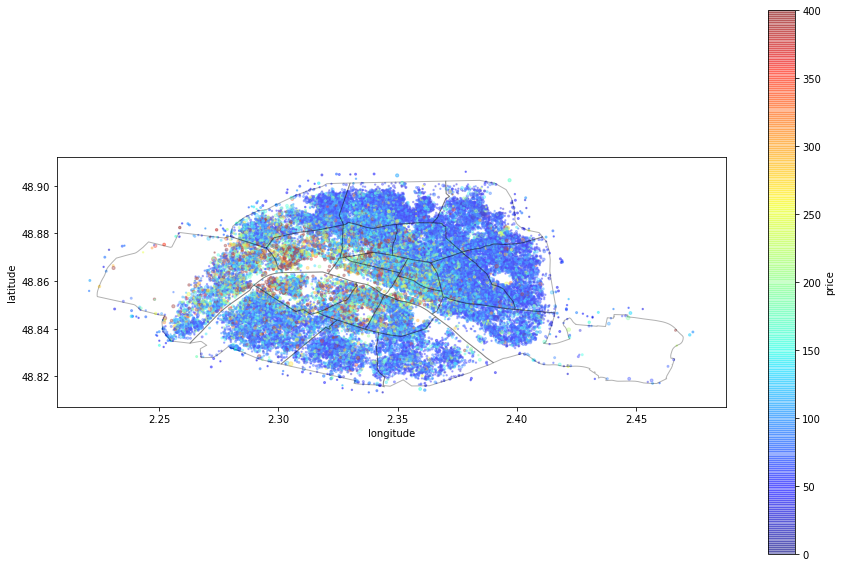

In [17]:
fig, ax = plt.subplots()
listings_df.plot(ax = ax, kind="scatter", x="longitude", y="latitude", c='price'  , cmap=plt.get_cmap("jet"),
                    vmax=400 ,colorbar=True ,alpha=0.4, figsize=(15,10), s=listings_df['beds']*2)
neighbourhoods_df.plot(ax=ax, alpha=0.3,color='white', edgecolor='k')
plt.show()

# Vizualisation series calandar price

In [18]:
calandar_avg_df = rslt_df.groupby(by=['date','neighbourhood_cleansed']).mean()

In [19]:
data = (pd.DataFrame(data={'price' : calandar_avg_df['price_x']})
        .reset_index())

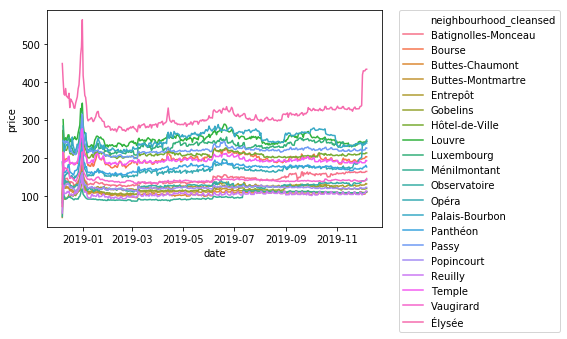

In [20]:
sns.lineplot(y='price', x='date', hue='neighbourhood_cleansed',
             data=data)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,)

## encode amenities

In [29]:
# label encoder amenities
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern = '(?!,|$)(.+?)(?=,|$)')
# first, get rid of all the '\"'s:
amenities_col = listings_df['amenities'].str[1:-1].replace('\"', '')
# Now actually transform the data:
X = vectorizer.fit_transform(amenities_col)
labels = vectorizer.get_feature_names()

In [30]:
# dense dataframe for amenities
df2 = pd.DataFrame(X.todense(), columns = ['AMN_'+label for label in labels])
df2.set_index(listings_df.id, inplace=True)
#df2.head(3)

# supprimer amenities

In [31]:
## vizualization

In [32]:
# number of this amenities total
t = df2.cumsum().max()
# percentage of this ameneties
p = df2.cumsum().max() / len(df2)
print('number of amenities :',len(p))
# rule to remove variable
rule = 0.15
r = p[p > rule][p < 1 - rule]
print('number of amenities after apply the rule :',len(r))

number of amenities : 164
number of amenities after apply the rule : 28


TypeError: unsupported operand type(s) for -: 'str' and 'float'

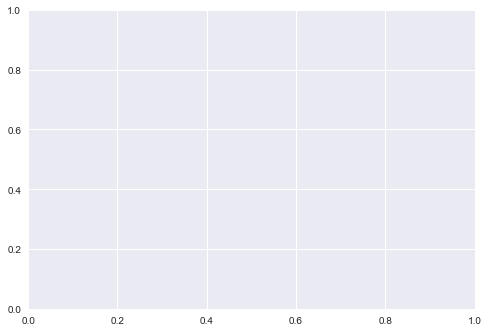

In [33]:
# percentage for each ameneties
plt.bar(r.sort_values().index, r.sort_values())
plt.xticks(rotation=90)
plt.show()

In [34]:
# change df2 index remove not important variable
df2 = df2[list(r.index)]

## encode arrondissement

In [35]:
# create label encoder arrondissement
df3 = pd.get_dummies(listings_df['neighbourhood_cleansed'])
df3.set_index(listings_df.id, inplace=True)

TypeError: unsupported operand type(s) for -: 'str' and 'float'

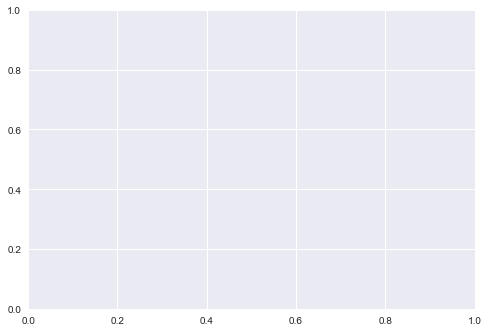

In [36]:
# number of this amenities total
t = df3.cumsum().max()
# percentage of this ameneties
p = df3.cumsum().max() / len(df3)
# percentage for each ameneties
plt.bar(p.sort_values().index, p.sort_values())
plt.xticks(rotation=90)
plt.show()

## Merge dataframe

In [37]:
# merge label encoders + listings_df
listings_df.set_index(listings_df.id, inplace=True)
listings_encode_df = pd.concat([listings_df, df2, df3], axis=1)

Variable to identify if the host is professional or not

In [38]:
listings_encode_df['professional'] = np.where(listings_encode_df['availability_365'] > 120, 1, 0)

Encode Property_type

In [39]:
listings_encode_df['property_type'].value_counts()

Apartment                 54421
Condominium                1521
Loft                       1202
Boutique hotel              768
Serviced apartment          478
House                       453
Bed and breakfast           256
Townhouse                   203
Other                       132
Hotel                       113
Guesthouse                   99
Hostel                       98
Guest suite                  42
Tiny house                   19
Boat                         18
Villa                        14
Aparthotel                   11
Houseboat                    10
Casa particular (Cuba)        4
Resort                        3
Nature lodge                  2
Cave                          2
Earth house                   2
Bungalow                      2
Dorm                          1
Treehouse                     1
Igloo                         1
Barn                          1
Cottage                       1
Tipi                          1
Dome house                    1
Cabin   

In [40]:
property_type = pd.get_dummies(listings_encode_df['property_type'])

In [41]:
listings_encode_df = pd.concat([listings_encode_df, property_type], axis=1)

In [42]:
# true or false to 1 or 0

In [43]:
for i in ['host_is_superhost', 'host_identity_verified', 'host_has_profile_pic',
'is_location_exact', 'requires_license', 'instant_bookable',
'require_guest_profile_picture', 'require_guest_phone_verification']:
    listings_encode_df[i] = listings_encode_df[i].map(lambda s: 0 if s == "f" else 1)

listings_encode_df.head()


KeyError: 'is_location_exact'

Encoding of room type

In [44]:
listings_encode_df['room_type'].value_counts()

Entire home/apt    51983
Private room        7428
Shared room          470
Name: room_type, dtype: int64

In [45]:
room_type = pd.get_dummies(listings_encode_df['room_type'])

In [46]:
listings_encode_df = pd.concat([listings_encode_df, room_type], axis=1)

In [47]:
listings_encode_df.head()

,id,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,...,Resort,Serviced apartment,Tiny house,Tipi,Townhouse,Treehouse,Villa,Entire home/apt,Private room,Shared room
id,,,,,,,,,,,,,,,,,,,,,
2577,2577,0,2.0,1,1,Entrepôt,48.869933,2.362511,Loft,Entire home/apt,...,0,0,0,0,0,0,0,1,0,0
3109,3109,0,1.0,1,0,Observatoire,48.833494,2.318518,Apartment,Entire home/apt,...,0,0,0,0,0,0,0,1,0,0
5396,5396,0,1.0,1,1,Hôtel-de-Ville,48.851001,2.358690,Apartment,Entire home/apt,...,0,0,0,0,0,0,0,1,0,0
7397,7397,1,2.0,1,1,Hôtel-de-Ville,48.857576,2.352751,Apartment,Entire home/apt,...,0,0,0,0,0,0,0,1,0,0
7964,7964,0,1.0,1,1,Opéra,48.874642,2.343411,Apartment,Entire home/apt,...,0,0,0,0,0,0,0,1,0,0


Encoding of cancellation policy

In [48]:
listings_encode_df['cancellation_policy'].value_counts()

flexible                       21561
strict_14_with_grace_period    20324
moderate                       17677
super_strict_60                  195
super_strict_30                  120
strict                             4
Name: cancellation_policy, dtype: int64

In [49]:
cancellation_policy = pd.get_dummies(listings_encode_df['cancellation_policy'])

In [50]:
listings_encode_df = pd.concat([listings_encode_df, cancellation_policy], axis=1)

In [51]:
listings_encode_df.head()

,id,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,...,Villa,Entire home/apt,Private room,Shared room,flexible,moderate,strict,strict_14_with_grace_period,super_strict_30,super_strict_60
id,,,,,,,,,,,,,,,,,,,,,
2577,2577,0,2.0,1,1,Entrepôt,48.869933,2.362511,Loft,Entire home/apt,...,0,1,0,0,0,0,0,1,0,0
3109,3109,0,1.0,1,0,Observatoire,48.833494,2.318518,Apartment,Entire home/apt,...,0,1,0,0,1,0,0,0,0,0
5396,5396,0,1.0,1,1,Hôtel-de-Ville,48.851001,2.358690,Apartment,Entire home/apt,...,0,1,0,0,0,0,0,1,0,0
7397,7397,1,2.0,1,1,Hôtel-de-Ville,48.857576,2.352751,Apartment,Entire home/apt,...,0,1,0,0,0,1,0,0,0,0
7964,7964,0,1.0,1,1,Opéra,48.874642,2.343411,Apartment,Entire home/apt,...,0,1,0,0,0,0,0,1,0,0


In [52]:
columns = ['super_strict_60', 'super_strict_30', 'strict']
listings_encode_df.drop(columns, inplace=True, axis=1)

Encode bed type

In [53]:
listings_encode_df['bed_type'].value_counts()

Real Bed         56125
Pull-out Sofa     2895
Couch              563
Futon              277
Airbed              21
Name: bed_type, dtype: int64

In [54]:
listings_encode_df['real_bed'] = np.where((listings_encode_df['bed_type'] == 'Real Bed'), 1,
                                              np.where((listings_encode_df['bed_type'] != 'Real Bed'), 0, 0))

In [55]:
listings_encode_df.head()

,id,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,...,Townhouse,Treehouse,Villa,Entire home/apt,Private room,Shared room,flexible,moderate,strict_14_with_grace_period,real_bed
id,,,,,,,,,,,,,,,,,,,,,
2577,2577,0,2.0,1,1,Entrepôt,48.869933,2.362511,Loft,Entire home/apt,...,0,0,0,1,0,0,0,0,1,1
3109,3109,0,1.0,1,0,Observatoire,48.833494,2.318518,Apartment,Entire home/apt,...,0,0,0,1,0,0,1,0,0,1
5396,5396,0,1.0,1,1,Hôtel-de-Ville,48.851001,2.358690,Apartment,Entire home/apt,...,0,0,0,1,0,0,0,0,1,0
7397,7397,1,2.0,1,1,Hôtel-de-Ville,48.857576,2.352751,Apartment,Entire home/apt,...,0,0,0,1,0,0,0,1,0,1
7964,7964,0,1.0,1,1,Opéra,48.874642,2.343411,Apartment,Entire home/apt,...,0,0,0,1,0,0,0,0,1,1


In [56]:
listings_encode_df['cleaning_fee'] = listings_encode_df['cleaning_fee'].apply(correction)

In [57]:
listings_encode_df['security_deposit'] = listings_encode_df['security_deposit'].apply(correction)

In [58]:
listings_encode_df['security_deposit'].head()

id
2577      0.0
3109      0.0
5396      0.0
7397    200.0
7964    500.0
Name: security_deposit, dtype: float64

In [59]:
list(listings_encode_df)

['id',
 'host_is_superhost',
 'host_listings_count',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood_cleansed',
 'latitude',
 'longitude',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
 'price',
 'security_deposit',
 'cleaning_fee',
 'guests_included',
 'availability_365',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'requires_license',
 'instant_bookable',
 'cancellation_policy',
 'require_guest_profile_picture',
 'require_guest_phone_verification',
 'AMN_"bed linens"',
 'AMN_"buzzer/wireless intercom"',
 'AMN_"cable tv"',
 'AMN_"carbon monoxide detector"',
 'AMN_"coffee maker"',
 'AMN_"cooking basics"',
 'AMN_"dishes and silverware"',
 'AMN_"family/kid friendly"',
 'AMN_"hair dryer"',
 'AMN_"host greets you"',
 'AMN_"hot water"',
 'AMN_"laptop friendly work

In [60]:
columns = ['id','neighbourhood_cleansed', 
           'property_type', 'room_type','bed_type', 'amenities', 'availability_365', 'requires_license', 'cancellation_policy']
listings_encode_df.drop(columns, inplace=True, axis=1)

In [61]:
list(listings_encode_df)

['host_is_superhost',
 'host_listings_count',
 'host_has_profile_pic',
 'host_identity_verified',
 'latitude',
 'longitude',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'price',
 'security_deposit',
 'cleaning_fee',
 'guests_included',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'instant_bookable',
 'require_guest_profile_picture',
 'require_guest_phone_verification',
 'AMN_"bed linens"',
 'AMN_"buzzer/wireless intercom"',
 'AMN_"cable tv"',
 'AMN_"carbon monoxide detector"',
 'AMN_"coffee maker"',
 'AMN_"cooking basics"',
 'AMN_"dishes and silverware"',
 'AMN_"family/kid friendly"',
 'AMN_"hair dryer"',
 'AMN_"host greets you"',
 'AMN_"hot water"',
 'AMN_"laptop friendly workspace"',
 'AMN_"paid parking off premises"',
 'AMN_"smoke detector"',
 'AMN_"smoking allowed"',
 'AMN_"translation missing: en.hosting_amenity_50"',
 'AMN_drye

In [62]:
listings_encode_df = listings_encode_df.set_index('price').reset_index()

In [63]:
listings_encode_df.head(10)

,price,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bathrooms,bedrooms,...,Townhouse,Treehouse,Villa,Entire home/apt,Private room,Shared room,flexible,moderate,strict_14_with_grace_period,real_bed
0,125.0,0,2.0,1,1,48.869933,2.362511,4,2.0,2.0,...,0,0,0,1,0,0,0,0,1,1
1,75.0,0,1.0,1,0,48.833494,2.318518,2,1.0,1.0,...,0,0,0,1,0,0,1,0,0,1
2,115.0,0,1.0,1,1,48.851001,2.358690,2,1.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,115.0,1,2.0,1,1,48.857576,2.352751,4,1.0,2.0,...,0,0,0,1,0,0,0,1,0,1
4,99.0,0,1.0,1,1,48.874642,2.343411,2,1.0,2.0,...,0,0,0,1,0,0,0,0,1,1
5,90.0,0,1.0,1,0,48.865279,2.393263,3,1.0,1.0,...,0,0,0,1,0,0,0,1,0,1
6,75.0,0,3.0,1,0,48.858985,2.347347,2,1.0,1.0,...,0,0,0,1,0,0,0,0,1,1
7,70.0,1,1.0,1,0,48.862266,2.371341,2,1.0,1.0,...,0,0,0,1,0,0,0,0,1,1
8,135.0,1,6.0,1,1,48.862775,2.374680,5,1.0,2.0,...,0,0,0,1,0,0,0,0,1,1
9,105.0,1,6.0,1,1,48.867430,2.375240,4,1.0,1.0,...,0,0,0,1,0,0,0,0,1,1


In [80]:
listings_encode_df.shape # 59881 * 0,3 = 17964 (for training)

(59881, 112)

In [65]:
# change AMN

In [66]:
import re

In [67]:
data = listings_encode_df

In [68]:
data = data.rename(columns=lambda x: re.sub('"','',x))

In [69]:
data.columns

Index(['price', 'host_is_superhost', 'host_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'latitude',
       'longitude', 'accommodates', 'bathrooms', 'bedrooms',
       ...
       'Townhouse', 'Treehouse', 'Villa', 'Entire home/apt', 'Private room',
       'Shared room', 'flexible', 'moderate', 'strict_14_with_grace_period',
       'real_bed'],
      dtype='object', length=112)

In [70]:
data = data.rename(columns=lambda x: re.sub(' ','_',x))

In [71]:
data.columns

Index(['price', 'host_is_superhost', 'host_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'latitude',
       'longitude', 'accommodates', 'bathrooms', 'bedrooms',
       ...
       'Townhouse', 'Treehouse', 'Villa', 'Entire_home/apt', 'Private_room',
       'Shared_room', 'flexible', 'moderate', 'strict_14_with_grace_period',
       'real_bed'],
      dtype='object', length=112)

In [72]:
data = data.rename(columns=lambda x: re.sub('_+','_',x))

In [73]:
data = data.rename(columns=lambda x: re.sub('’','',x))

In [74]:
data = data.rename(columns=lambda x: re.sub('/','_',x))

In [75]:
data = data.rename(columns=lambda x: re.sub('_+','_',x))

In [76]:
data.dropna(inplace=True)

In [77]:
data.to_csv("listings_encode_df_5.csv",sep=",", index=False)

In [79]:
list(data)

['price',
 'host_is_superhost',
 'host_listings_count',
 'host_has_profile_pic',
 'host_identity_verified',
 'latitude',
 'longitude',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'security_deposit',
 'cleaning_fee',
 'guests_included',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'instant_bookable',
 'require_guest_profile_picture',
 'require_guest_phone_verification',
 'AMN_bed_linens',
 'AMN_buzzer_wireless_intercom',
 'AMN_cable_tv',
 'AMN_carbon_monoxide_detector',
 'AMN_coffee_maker',
 'AMN_cooking_basics',
 'AMN_dishes_and_silverware',
 'AMN_family_kid_friendly',
 'AMN_hair_dryer',
 'AMN_host_greets_you',
 'AMN_hot_water',
 'AMN_laptop_friendly_workspace',
 'AMN_paid_parking_off_premises',
 'AMN_smoke_detector',
 'AMN_smoking_allowed',
 'AMN_translation_missing:_en.hosting_amenity_50',
 'AMN_dryer',
 'AMN_elevator',
 'AMN_hange

In [83]:
data.head(20)

,price,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bathrooms,bedrooms,...,Townhouse,Treehouse,Villa,Entire_home_apt,Private_room,Shared_room,flexible,moderate,strict_14_with_grace_period,real_bed
1,75.0,0,1.0,1,0,48.833494,2.318518,2,1.0,1.0,...,0,0,0,1,0,0,1,0,0,1
2,115.0,0,1.0,1,1,48.851001,2.358690,2,1.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,115.0,1,2.0,1,1,48.857576,2.352751,4,1.0,2.0,...,0,0,0,1,0,0,0,1,0,1
4,99.0,0,1.0,1,1,48.874642,2.343411,2,1.0,2.0,...,0,0,0,1,0,0,0,0,1,1
7,70.0,1,1.0,1,0,48.862266,2.371341,2,1.0,1.0,...,0,0,0,1,0,0,0,0,1,1
8,135.0,1,6.0,1,1,48.862775,2.374680,5,1.0,2.0,...,0,0,0,1,0,0,0,0,1,1
9,105.0,1,6.0,1,1,48.867430,2.375240,4,1.0,1.0,...,0,0,0,1,0,0,0,0,1,1
12,85.0,0,1.0,1,1,48.879001,2.316083,4,1.0,1.0,...,0,0,0,1,0,0,0,1,0,1
15,100.0,0,1.0,1,1,48.884342,2.340046,2,1.0,1.0,...,0,0,0,1,0,0,0,0,1,1
17,100.0,1,1.0,1,1,48.824046,2.368279,3,1.0,1.0,...,0,0,0,1,0,0,0,1,0,1


In [2]:
## Statistiques descriptives

In [4]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('listings_encode_df_5.csv', delimiter = ',')

In [6]:
data.head(10)

,price,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bathrooms,bedrooms,...,Townhouse,Treehouse,Villa,Entire_home_apt,Private_room,Shared_room,flexible,moderate,strict_14_with_grace_period,real_bed
0,75.0,0,1.0,1,0,48.833494,2.318518,2,1.0,1.0,...,0,0,0,1,0,0,1,0,0,1
1,115.0,0,1.0,1,1,48.851001,2.358690,2,1.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,115.0,1,2.0,1,1,48.857576,2.352751,4,1.0,2.0,...,0,0,0,1,0,0,0,1,0,1
3,99.0,0,1.0,1,1,48.874642,2.343411,2,1.0,2.0,...,0,0,0,1,0,0,0,0,1,1
4,70.0,1,1.0,1,0,48.862266,2.371341,2,1.0,1.0,...,0,0,0,1,0,0,0,0,1,1
5,135.0,1,6.0,1,1,48.862775,2.374680,5,1.0,2.0,...,0,0,0,1,0,0,0,0,1,1
6,105.0,1,6.0,1,1,48.867430,2.375240,4,1.0,1.0,...,0,0,0,1,0,0,0,0,1,1
7,85.0,0,1.0,1,1,48.879001,2.316083,4,1.0,1.0,...,0,0,0,1,0,0,0,1,0,1
8,100.0,0,1.0,1,1,48.884342,2.340046,2,1.0,1.0,...,0,0,0,1,0,0,0,0,1,1
9,100.0,1,1.0,1,1,48.824046,2.368279,3,1.0,1.0,...,0,0,0,1,0,0,0,1,0,1


In [ ]:
data['price'].hist(bins=8)
#plt.axis([0, 1100, 0, 40000]) 
plt.ylabel('Count')
plt.xlabel('Listing price in Euro')
plt.title('Histogram of listing prices')

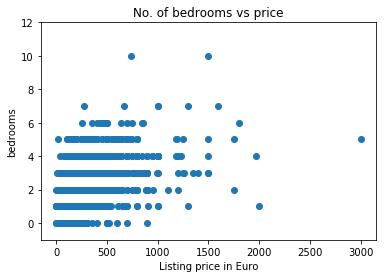

In [8]:
plt.scatter(data['price'],data['bedrooms'])
plt.ylim(-1, 12)
plt.ylabel('bedrooms')
plt.xlabel('Listing price in Euro')
plt.title('No. of bedrooms vs price')

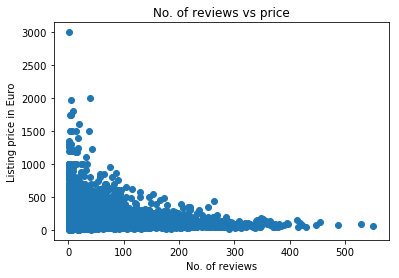

In [9]:
plt.scatter(data['number_of_reviews'],data['price'])
plt.ylabel('Listing price in Euro')
plt.xlabel('No. of reviews')
plt.title('No. of reviews vs price')

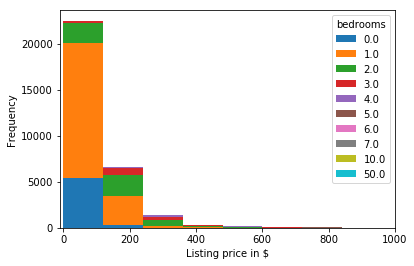

In [10]:
data.pivot(columns = 'bedrooms',values = 'price').plot.hist(stacked = True,bins=25)
plt.xlim(-10, 1000)
plt.xlabel('Listing price in $')

In [11]:
cols = ['number_of_reviews','host_listings_count',
       'bathrooms','bedrooms','beds','price']

In [12]:
import seaborn as sns

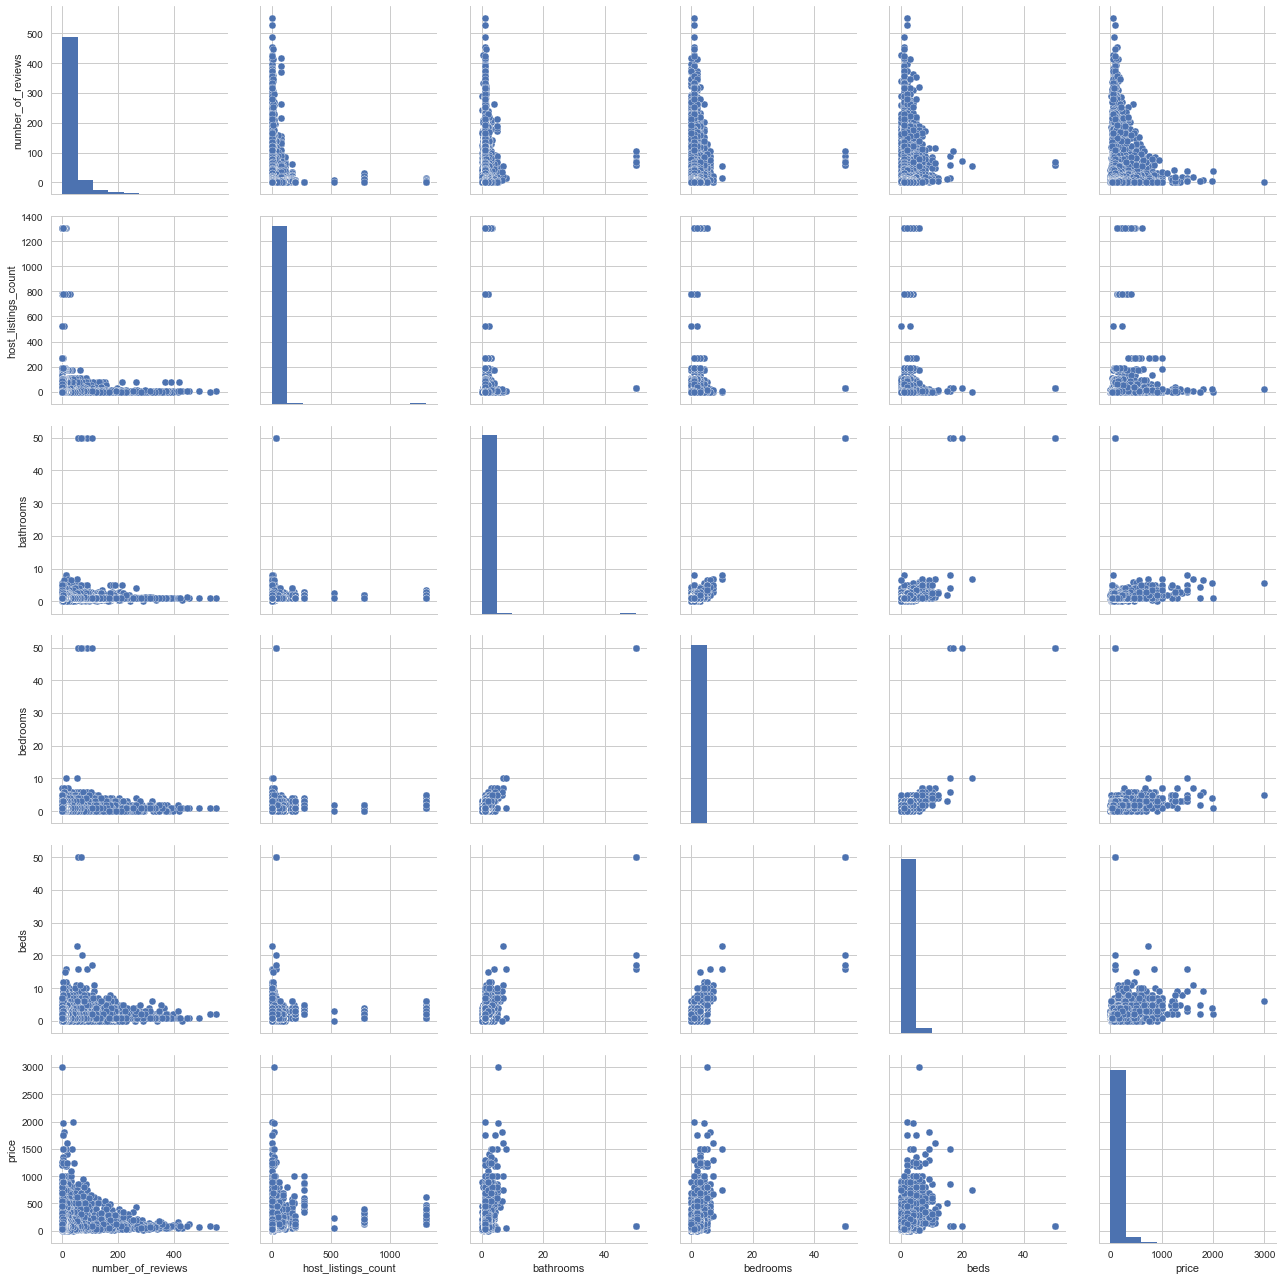

In [13]:
sns.set(style = 'whitegrid',context = 'notebook')
sns.pairplot(data[cols],size=3)
plt.show()

In [14]:
# prediction with https://datascienceplus.com/extreme-gradient-boosting-with-python/

In [15]:
! pip install xgboost

You are using pip version 18.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [16]:
import xgboost as xgb
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [17]:
for i in ['instant_bookable', 'require_guest_profile_picture', 'require_guest_phone_verification']:
    data[i] = data[i].map(lambda s: 0 if s == "f" else 1)

In [18]:
X = data.drop("price", axis = 1)
y = data['price'].values
y = y.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state=42)

In [19]:
DM_train = xgb.DMatrix(data = X_train, 
                       label = y_train)  
DM_test =  xgb.DMatrix(data = X_test,
                       label = y_test)

In [20]:
gbm_param_grid = {
     'colsample_bytree': np.linspace(0.5, 0.9, 5),
     'n_estimators':[100, 200],
     'max_depth': [10, 15, 20, 25]
}

In [21]:
gbm = xgb.XGBRegressor()

In [ ]:
grid_mse = GridSearchCV(estimator = gbm, param_grid = gbm_param_grid, scoring = 'neg_mean_squared_error', cv = 5, verbose = 1)

In [ ]:
grid_mse.fit(X_train, y_train)
print("Best parameters found: ",grid_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse.best_score_)))

In [ ]:
pred = grid_mse.predict(X_test)
print("Root mean square error for test dataset: {}".format(np.round(np.sqrt(mean_squared_error(y_test, pred)), 2)))

In [ ]:
test = pd.DataFrame({"prediction": pred, "observed": y_test.flatten()})
lowess = sm.nonparametric.lowess
z = lowess(pred.flatten(), y_test.flatten())
test.plot(figsize = [14,8],
          x ="prediction", y = "observed", kind = "scatter", color = 'darkred')
plt.title("Extreme Gradient Boosting: Prediction Vs Test Data", fontsize = 18, color = "darkgreen")
plt.xlabel("Predicted Power Output", fontsize = 18) 
plt.ylabel("Observed Power Output", fontsize = 18)
plt.plot(z[:,0], z[:,1], color = "blue", lw= 3)
plt.show()